------------------------------
Number of overlapping trading days: 1259
Correlation between SPY and GSPC: 0.997731
------------------------------


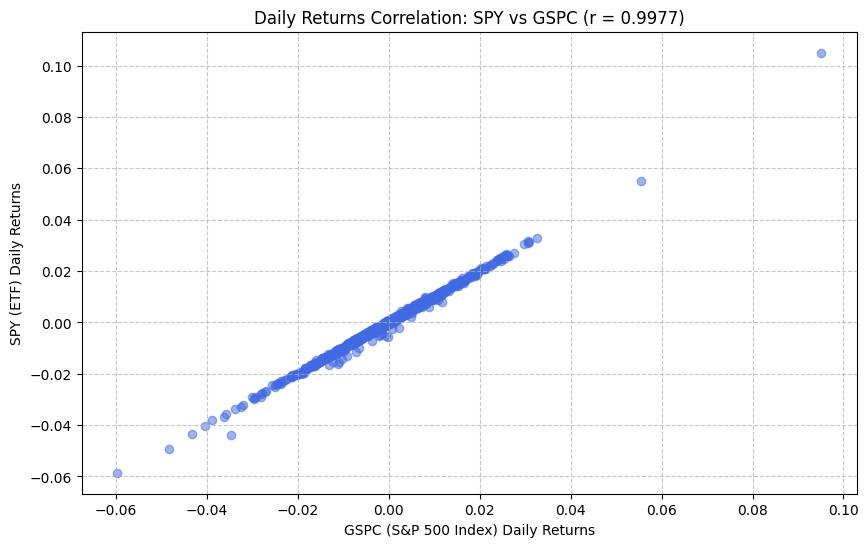

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the data
spy_data = pd.read_excel('Workshop Data.xlsx', sheet_name='SPY', parse_dates=['Date'], index_col='Date')
gspc_data = pd.read_excel('SP500 Index Data.xlsx', sheet_name='SPY', parse_dates=['Date'], index_col='Date')

# 2. Ensure data is sorted by date
spy_data.sort_index(inplace=True)
gspc_data.sort_index(inplace=True)

# 3. Concatenate with an 'inner' join
combined = pd.concat([spy_data['Close'], gspc_data['PX_LAST']], axis=1, join='inner')
combined.columns = ['SPY_Price', 'GSPC_Price']

# 4. Calculate Daily Returns
returns = combined.pct_change().dropna()

# 5. Calculate the Correlation Coefficient
correlation = returns['SPY_Price'].corr(returns['GSPC_Price'])

# 6. Output the results
print("-" * 30)
print(f"Number of overlapping trading days: {len(returns)}")
print(f"Correlation between SPY and GSPC: {correlation:.6f}")
print("-" * 30)

# 7. Visualization
plt.figure(figsize=(10, 6))
plt.scatter(returns['GSPC_Price'], returns['SPY_Price'], alpha=0.5, color='royalblue')
plt.title(f'Daily Returns Correlation: SPY vs GSPC (r = {correlation:.4f})')
plt.xlabel('GSPC (S&P 500 Index) Daily Returns')
plt.ylabel('SPY (ETF) Daily Returns')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()